Importaçoes

In [345]:
#importaçoes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score, davies_bouldin_score
from scipy.stats import spearmanr, chi2_contingency

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import IncrementalPCA

from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler


Dataset e analise descritiva

In [346]:
#dataset 
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [347]:
df = df.set_index('TransactionDate')

In [348]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 2023-04-11 16:29:14 to 2023-02-14 16:21:23
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionType          2512 non-null   object 
 4   Location                 2512 non-null   object 
 5   DeviceID                 2512 non-null   object 
 6   IP Address               2512 non-null   object 
 7   MerchantID               2512 non-null   object 
 8   Channel                  2512 non-null   object 
 9   CustomerAge              2512 non-null   int64  
 10  CustomerOccupation       2512 non-null   object 
 11  TransactionDuration      2512 non-null   int64  
 12  LoginAttempts            2512 non-null   int64  
 13  AccountBalance           2512 non-null   float64
 

In [350]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [351]:
df['TransactionType'].unique()

array(['Debit', 'Credit'], dtype=object)

In [352]:
df['Location'].unique()

array(['San Diego', 'Houston', 'Mesa', 'Raleigh', 'Atlanta',
       'Oklahoma City', 'Seattle', 'Indianapolis', 'Detroit', 'Nashville',
       'Albuquerque', 'Memphis', 'Louisville', 'Denver', 'Austin',
       'Columbus', 'Los Angeles', 'Las Vegas', 'Fort Worth', 'Miami',
       'Milwaukee', 'Baltimore', 'New York', 'San Francisco', 'San Jose',
       'San Antonio', 'Philadelphia', 'Charlotte', 'Tucson', 'Chicago',
       'Sacramento', 'Kansas City', 'Omaha', 'Virginia Beach', 'Dallas',
       'Boston', 'Jacksonville', 'Phoenix', 'Washington', 'El Paso',
       'Colorado Springs', 'Fresno', 'Portland'], dtype=object)

In [353]:
df['Channel'].unique()

array(['ATM', 'Online', 'Branch'], dtype=object)

In [354]:
df['CustomerOccupation'].unique()

array(['Doctor', 'Student', 'Retired', 'Engineer'], dtype=object)

In [355]:
df_1 = df.copy()

In [356]:
df_1

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
TransactionDate,,,,,,,,,,,,,,,
2023-04-11 16:29:14,TX000001,AC00128,14.09,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
2023-06-27 16:44:19,TX000002,AC00455,376.24,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2023-07-10 18:16:08,TX000003,AC00019,126.29,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
2023-05-05 16:32:11,TX000004,AC00070,184.50,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
2023-10-16 17:51:24,TX000005,AC00411,13.45,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26 17:09:36,TX002508,AC00297,856.21,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2023-03-22 17:36:48,TX002509,AC00322,251.54,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2023-08-21 17:08:50,TX002510,AC00095,28.63,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39


EDA

Text(0.5, 1.0, 'maiores 5 transaçoes por TransactionID')

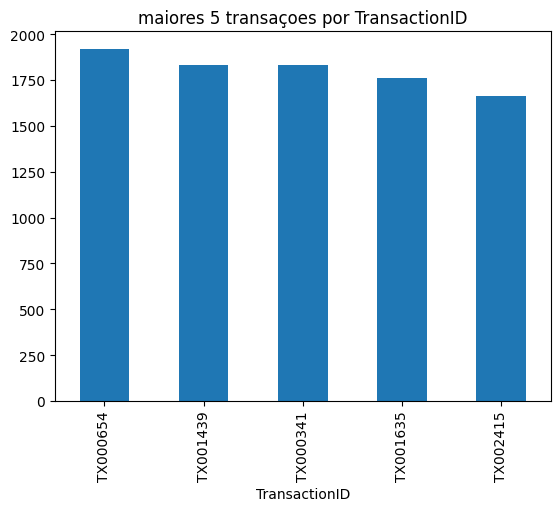

In [357]:
#analise de ids TransactionID
max_TransactionID = df.groupby('TransactionID')['TransactionAmount'].max()
top_5_TransactionID = max_TransactionID.nlargest(5)
top_5_TransactionID.sort_values(ascending=False).plot(kind='bar')
plt.title('maiores 5 transaçoes por TransactionID')


Text(0.5, 1.0, 'maiores 5 transaçoes por MerchantID')

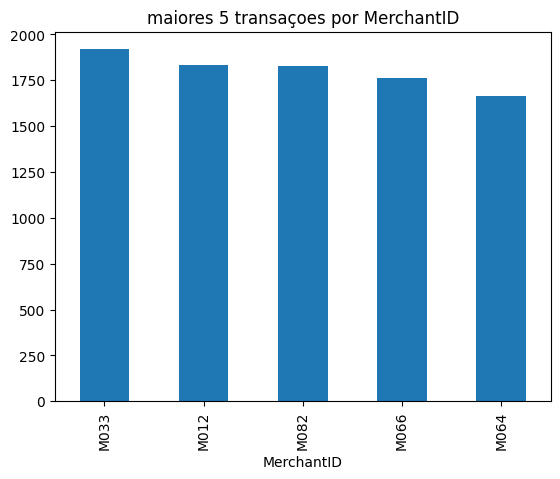

In [358]:
max_MerchantID = df.groupby('MerchantID')['TransactionAmount'].max()
top_MerchantID =  max_MerchantID.nlargest(5)
top_MerchantID.sort_values(ascending=False).plot(kind='bar')
plt.title('maiores 5 transaçoes por MerchantID')


In [359]:
#drops
df_1 = df_1.drop('TransactionID', axis=1)
df_1 = df_1.drop('AccountID', axis=1)
df_1 = df_1.drop('DeviceID', axis=1)
df_1 = df_1.drop('IP Address', axis=1)
df_1 = df_1.drop('MerchantID', axis=1)
df_1 = df_1.drop('PreviousTransactionDate', axis=1)

In [360]:
#separar categorias de numeros 
num_col = df_1.select_dtypes(exclude='object')
cat_col = df_1.select_dtypes(exclude='number').columns

In [361]:
cat_col

Index(['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], dtype='object')

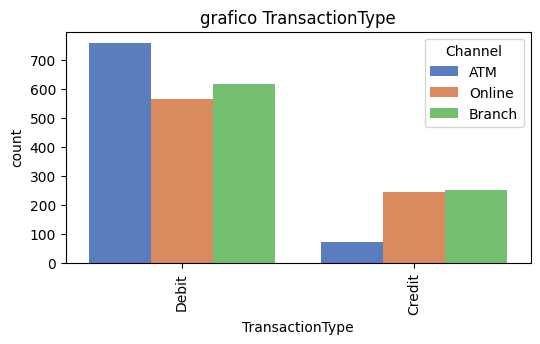

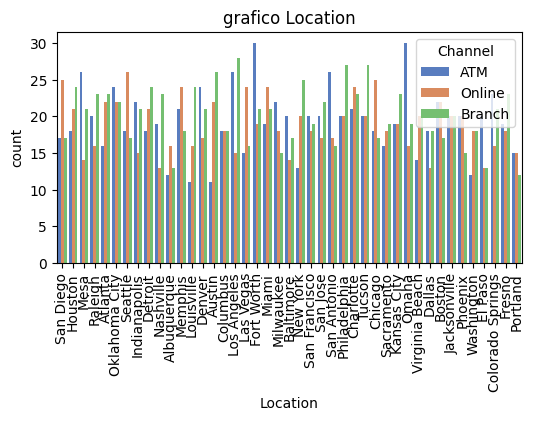

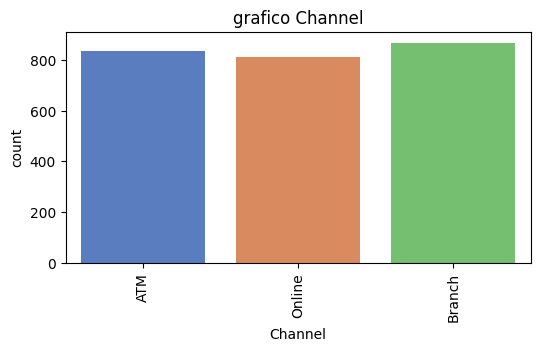

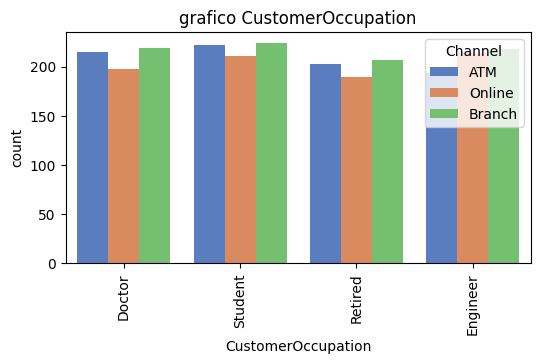

In [362]:
#graficos categoricos 
for i, cat in enumerate(cat_col):
    plt.figure(figsize=(6,3))
    sns.countplot(data=df_1,x=cat, hue='Channel', palette='muted')
    plt.title(f'grafico {cat}')
    plt.xlabel(cat)
    plt.xticks(rotation=90)
    plt.show()
    

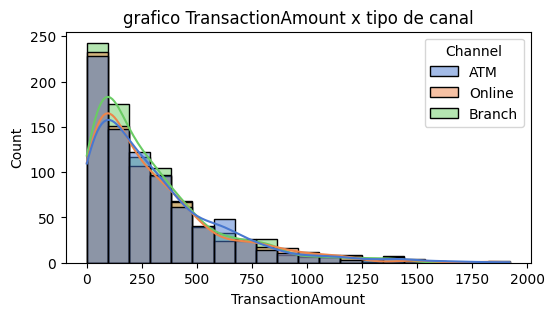

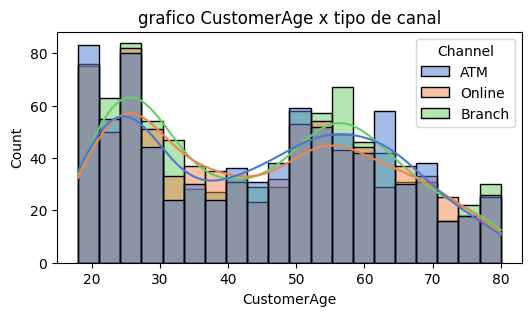

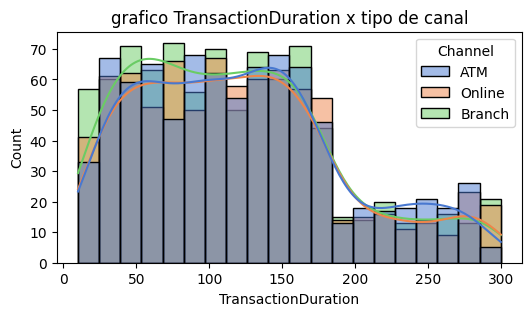

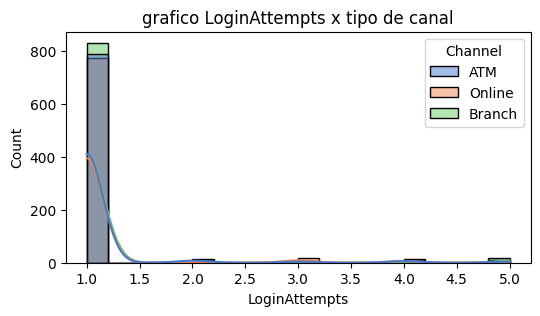

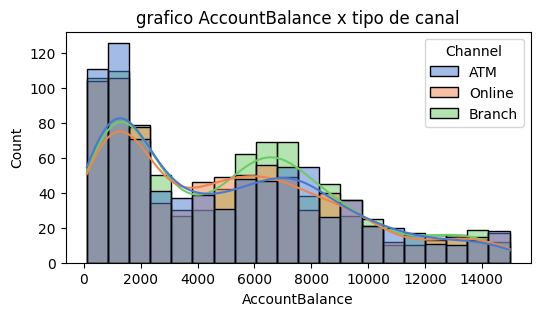

In [363]:
#graficos numericos 
for i, num in enumerate(num_col):
    plt.figure(figsize=(6,3))
    sns.histplot(data=df_1, x=num, hue='Channel', bins=20, palette='muted', kde=True)
    plt.title(f'grafico {num} x tipo de canal')
    plt.xlabel(num)
    plt.show()
    

In [364]:
df_1.columns

Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

In [365]:
#selecionei variaveis especificas para facilitar algumas analises
variables = ['LoginAttempts', 'Location', 'Channel', 'CustomerOccupation'
]

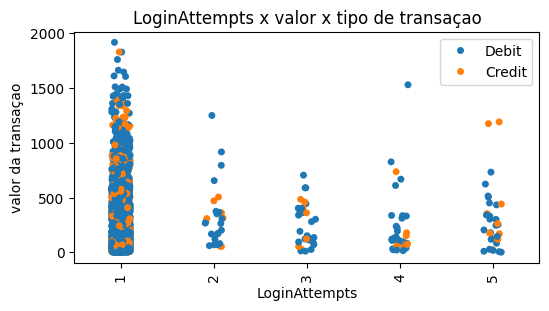

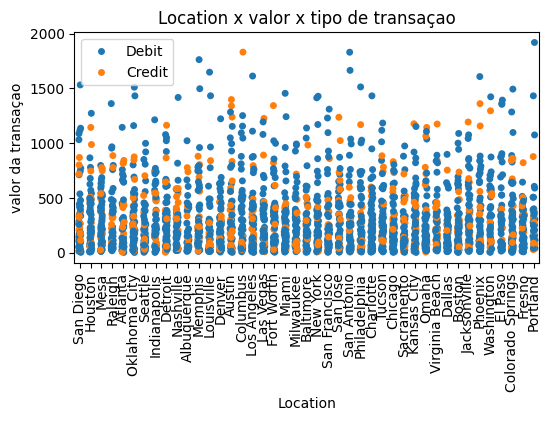

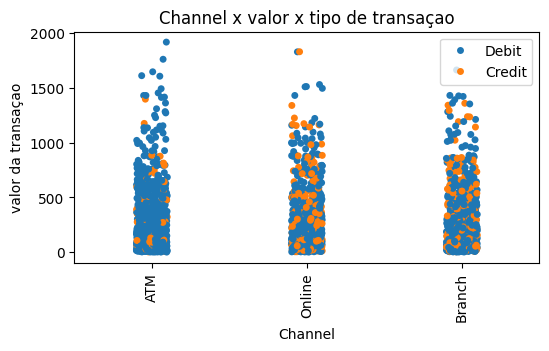

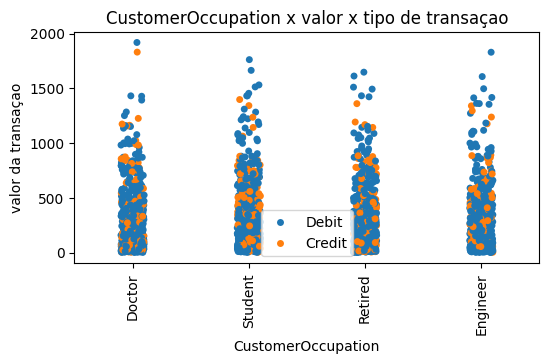

In [366]:
#graf para entender algumas relaçoes 
for i, plot in enumerate(variables):
    plt.figure(figsize=(6,3))
    sns.stripplot(data=df_1, x=plot,y='TransactionAmount', hue='TransactionType')
    plt.title(f'{plot} x valor x tipo de transaçao')
    plt.xlabel(plot)
    plt.ylabel('valor da transaçao')
    plt.xticks(rotation= 90)
    plt.legend()
    plt.show()

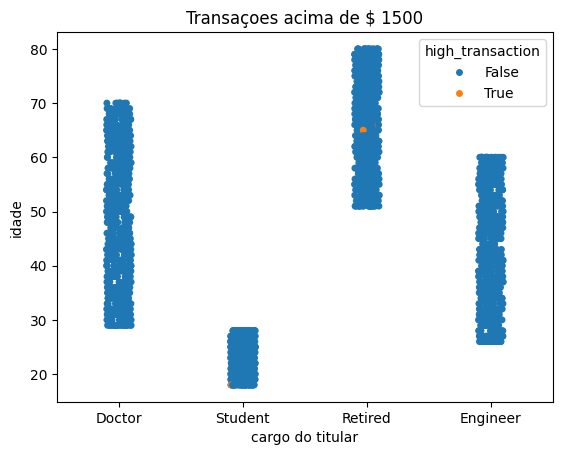

In [367]:
# idade x valor x profisao 
df_1['high_transaction'] = df['TransactionAmount'] > 1500
sns.stripplot(data=df_1, x='CustomerOccupation', y='CustomerAge', hue='high_transaction')
plt.title('Transaçoes acima de $ 1500')
plt.xlabel('cargo do titular')
plt.ylabel('idade')
plt.show()

conclusoes pós EDA:



- 1:estudantes tendem a fazer transaçoes com valores fora da curva? esquisito. 
- 2:o tipo do canal tende a influenciar o valor das transaçoes? 
- 3:a profissao influencia no valor da transaçao?
- 4: o tipo da transaçao altera o valor da transaçao?

temos as seguintes hipoteses(afirmaçoes) NULAS:
- estudantes tendem sim a fazer transaçoes fora da curva: comprar um notebook, mantimentos e etc
- o tipo de canal que a transaçao foi efetuado nao influencia no valor da mesma 
- a profissao influencia no valor da transaçao: um doutor tende a movimentar maior quantidade de grana que um estudante
- o tipo de transaçao altera o valor da transaçao

Inferencia 

- hipotese nula: nao há efeito estatistico nessa afirmaçao
- hipotese alternativa: há efeito estatistico  nessa afirmaçao 


In [368]:
#fazer teste de hipoteses
alpha = 0.05 


<Axes: >

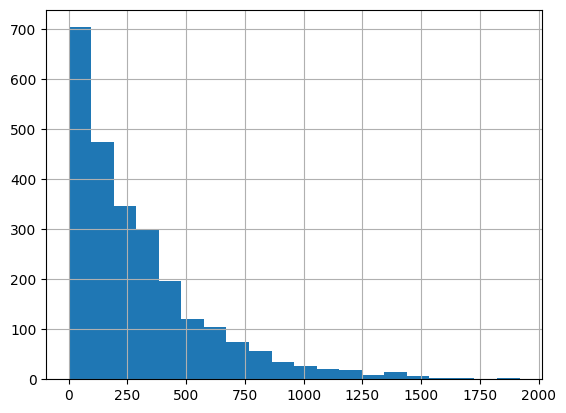

In [369]:
#verificar se coluna TransactionAmount segue uma normal 
df_1.TransactionAmount.hist(bins=20)


- teste de Spearman: se as variaveis forem numericas, mas nao normais
- teste chi²: se as variaveis forem categoricas


In [370]:
#1:estudantes tendem a fazer transaçoes com valores fora da curva?
#correlaçao de spearman: colunas CustumerAge x TransactionAmount
c_spearman, p_spearman = spearmanr(df_1['CustomerAge'],df_1['TransactionAmount'] )
print(f'as variaveis possuem correlaçao de {c_spearman} e p_valor de {p_spearman}')
if p_spearman < alpha:
    print('rejeitamos a hipotese nula entre colunas CustumerAge e TransactionAmount')
else:
    print('aceitamos a hipotese nula entre colunas CustumerAge e TransactionAmount')

as variaveis possuem correlaçao de -0.020040281870545792 e p_valor de 0.3153704452234714
aceitamos a hipotese nula entre colunas CustumerAge e TransactionAmount


In [371]:
#2:o tipo do canal tende a influenciar o valor das transaçoes?
#teste chi²: colunas TransactionAmount x TransactionType
cross_tab = pd.crosstab(df['TransactionAmount'], df['Channel'])
chi2, p_chi2, dof, expected  = chi2_contingency(cross_tab)
print(f'as variveis possuem correlaçao de {chi2} e p_valor de {p_chi2}')
if p_chi2 < alpha:
    print('rejeitamos a hipotese nula entre as colunas TransactionAmount e Channel')
else:
    print('aceitamos a hipotese nula entre colunas TransactionAmount e Channel')

as variveis possuem correlaçao de 4911.615195762088 e p_valor de 0.48276755537119836
aceitamos a hipotese nula entre colunas TransactionAmount e Channel


In [372]:
df_1.columns

Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'high_transaction'],
      dtype='object')

In [373]:
#3:a profissao influencia no valor da transaçao?
cross_tab_2 = pd.crosstab(df['TransactionAmount'],df['CustomerOccupation'])
chi2_1, p_chi2_1, dof_1, expected_1 = chi2_contingency(cross_tab_2)
print(f'as variveis possuem correlaçao de {chi2_1} e p_valor de {p_chi2_1}')
if chi2_1 < alpha:
    print('rejeitamos a hipotese nula entre colunas TransactionAmount x CustomerOccupation')
else:
    print('aceitamos a hipotese nula entre colunas TransactionAmount x CustomerOccupation ')


as variveis possuem correlaçao de 7374.6220681723535 e p_valor de 0.45642114772182635
aceitamos a hipotese nula entre colunas TransactionAmount x CustomerOccupation 


In [374]:
#4: o tipo da transaçao altera o valor da transaçao?
cross_tab_3 = pd.crosstab(df['TransactionType'], df['TransactionAmount'])
chi2_2, p_chi2_2, dof_2, expected_2 = chi2_contingency(cross_tab_3)
print(f'as variveis possuem correlaçao de {chi2_2} e p_valor de {p_chi2_2}')
if chi2_1 < alpha:
    print('rejeitamos a hipotese nula entre colunas TransactionAmount xTransactionType')
else:
    print('aceitamos a hipotese nula entre colunas TransactionAmount x TransactionType ')

as variveis possuem correlaçao de 2453.900384474198 e p_valor de 0.49677086662304015
aceitamos a hipotese nula entre colunas TransactionAmount x TransactionType 


In [375]:
num_col

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionDate,,,,,
2023-04-11 16:29:14,14.09,70,81,1,5112.21
2023-06-27 16:44:19,376.24,68,141,1,13758.91
2023-07-10 18:16:08,126.29,19,56,1,1122.35
2023-05-05 16:32:11,184.50,26,25,1,8569.06
2023-10-16 17:51:24,13.45,26,198,1,7429.40
...,...,...,...,...,...
2023-04-26 17:09:36,856.21,33,109,1,12690.79
2023-03-22 17:36:48,251.54,48,177,1,254.75
2023-08-21 17:08:50,28.63,56,146,1,3382.91


Cluster 

Kmeans

In [376]:
#encoder em todo df para criar uma variavel x_enc, com one hot 
oh = OneHotEncoder()
x_enc = oh.fit_transform(df_1)
x_enc.shape

(2512, 5375)

17134.95143312126
16319.993728305375
15807.147672308134
14907.13936814777
14705.846899757276
14567.144986306095
14671.210263069375
14396.455468986493
14161.412312415272
13921.612085029345


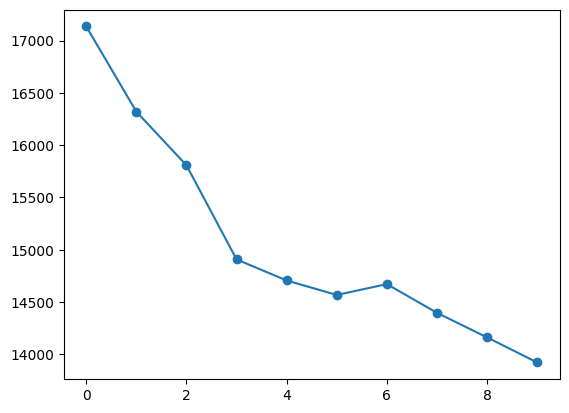

In [377]:
#teste do cotovelo com one hot 
inertia = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i, random_state=0).fit(x_enc)
    print(k_means.inertia_)
    inertia.append(k_means.inertia_)
plt.plot( inertia, marker='o')

[38437877865.8252]
[38437877865.8252, 10925012224.341835]
[38437877865.8252, 10925012224.341835, 4488308220.456908]
[38437877865.8252, 10925012224.341835, 4488308220.456908, 2561052530.497472]
[38437877865.8252, 10925012224.341835, 4488308220.456908, 2561052530.497472, 1722228000.8918839]
[38437877865.8252, 10925012224.341835, 4488308220.456908, 2561052530.497472, 1722228000.8918839, 1297714971.4729]
[38437877865.8252, 10925012224.341835, 4488308220.456908, 2561052530.497472, 1722228000.8918839, 1297714971.4729, 1067484296.7877091]
[38437877865.8252, 10925012224.341835, 4488308220.456908, 2561052530.497472, 1722228000.8918839, 1297714971.4729, 1067484296.7877091, 896140810.4769857]
[38437877865.8252, 10925012224.341835, 4488308220.456908, 2561052530.497472, 1722228000.8918839, 1297714971.4729, 1067484296.7877091, 896140810.4769857, 703475780.1613514]


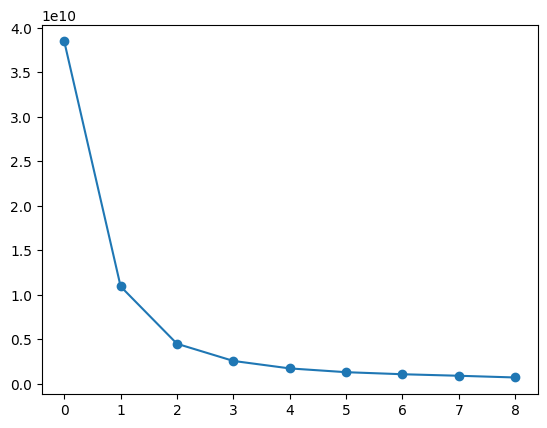

In [378]:
#teste do cotovelo so com variaveis numericas 
num_inertia = []
for j in range(1,10):
    num_kmeans = KMeans(n_clusters=j, random_state=0).fit(num_col)
    num_inertia.append(num_kmeans.inertia_)
    print(num_inertia)
plt.plot(num_inertia, marker='o')

- vemos que o teste do cotovelo se saiu bem melhor so com as variaveis numericas 
- temos k=1 e k=2 como pontos relevantes do nosso estudo, vamos avaliar metricas

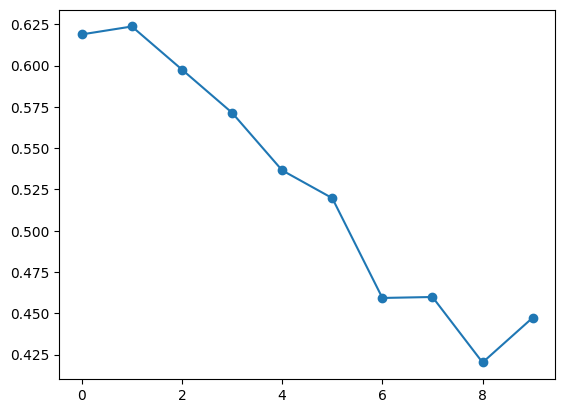

In [379]:
#avaliaçao silluetta para k=n
k_values = []
s = []
for h in range(2,12):
    kmeans_ava = KMeans(n_clusters=h, random_state=0).fit(num_col)
    k_values.append(h)
    s.append(silhouette_score(num_col, kmeans_ava.labels_))
plt.plot(s, marker='o', linestyle= '-')
    


In [380]:
#selecionando features
fraud_features = ['TransactionAmount', 'TransactionDuration']
X = df_1[fraud_features].copy()

In [381]:
#escalando os dados
scaler = StandardScaler()
X = scaler.fit_transform(X=X)


5024.0
3355.139784376816
1893.0666128758924
1452.746153339866
1136.1877559348475
968.3633841422411
852.7096642570027
718.3633272967934
625.8702836961703
580.2536085365117


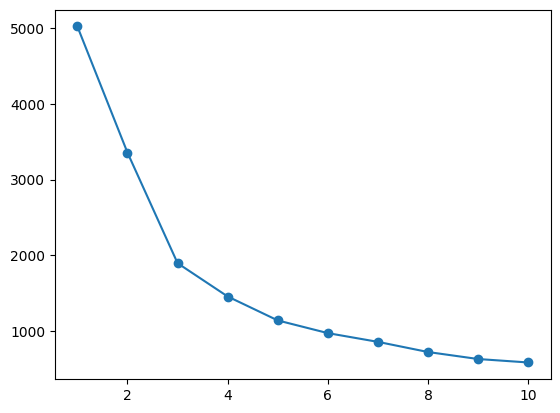

In [382]:
#teste de k
inertia_x = []
x_points = []
for x in range(1,11):
    x_kmeans = KMeans(n_clusters=x, random_state=0).fit(X)
    print(x_kmeans.inertia_)
    inertia_x.append(x_kmeans.inertia_)
    x_points.append(x)
plt.plot(x_points,inertia_x, marker='o')

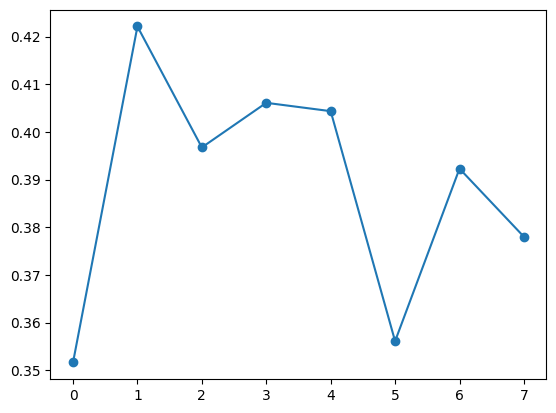

In [383]:
#teste silhouette com features especificas
s_x = []
for x_sil in range(2,10):
    kmeans_x = KMeans(n_clusters=x_sil, random_state=0).fit(X)
    s_x.append(silhouette_score(X, kmeans_x.labels_))
plt.plot(s_x, marker='o', linestyle= '-')

In [384]:
kmeans_final = KMeans(n_clusters=3, random_state=0).fit(X)

In [385]:
#teste davies bouldin
db_index = davies_bouldin_score(X, kmeans_final.labels_)
print(f'davies bouldin index: {db_index:.4f}')


davies bouldin index: 0.8169


o teste davies bouldin de 0.8169 indica que os dados tem um bom agrupamento 

In [386]:
#criaçao nova coluna cluster e centroids 
df_1['cluster'] = kmeans_final.labels_
df_1['distance_centroid'] = np.linalg.norm(X - kmeans_final.cluster_centers_[kmeans_final.labels_], axis=1)

In [387]:
#definiçao de threshold e filtro para potenciais fraudes
threshold = df_1['distance_centroid'].quantile(0.95)
potential_frauds = df_1[df_1['distance_centroid'] > threshold]

In [388]:
print(f"pontenciais fraudes: {len(potential_frauds)}")


pontenciais fraudes: 126


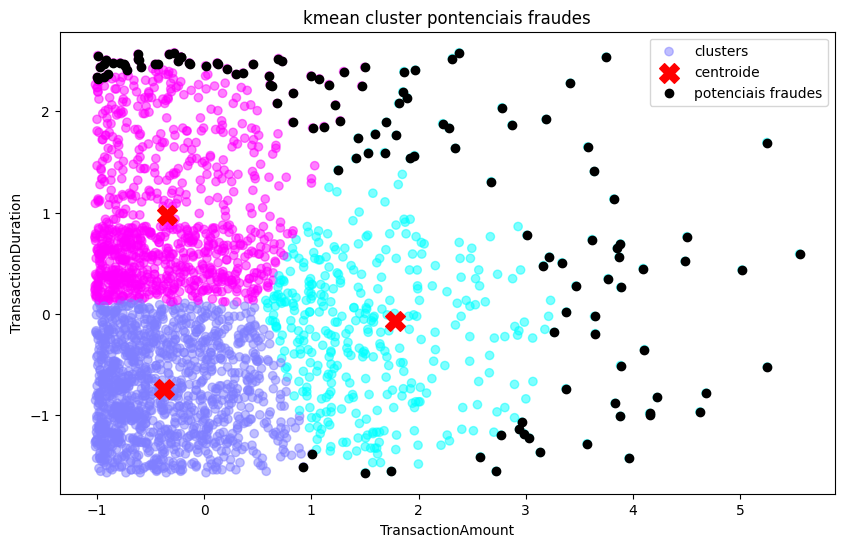

In [389]:
#vizualizando nosso agrupamento
plt.figure(figsize=(10,6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=kmeans_final.labels_, cmap='cool', alpha=0.5, label='clusters')
centroids = plt.scatter(kmeans_final.cluster_centers_[:,0], kmeans_final.cluster_centers_[:, 1], s=200, c='red', marker='X', label='centroide')
fraud_indices = [df_1.index.get_loc(i) for i in potential_frauds.index]
frauds = plt.scatter(X[fraud_indices, 0], X[fraud_indices, 1], 
                c='black', label='potenciais fraudes', edgecolors='k')
plt.xlabel(fraud_features[0])
plt.ylabel(fraud_features[1])
plt.title('kmean cluster pontenciais fraudes')
plt.legend(loc='upper right')
plt.show()

Detecçao de anomalias

In [390]:
df_1.columns

Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'high_transaction', 'cluster',
       'distance_centroid'],
      dtype='object')

In [391]:
#criando novas variaveis para trabalhar
new_features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
new_X = df_1[new_features].copy()

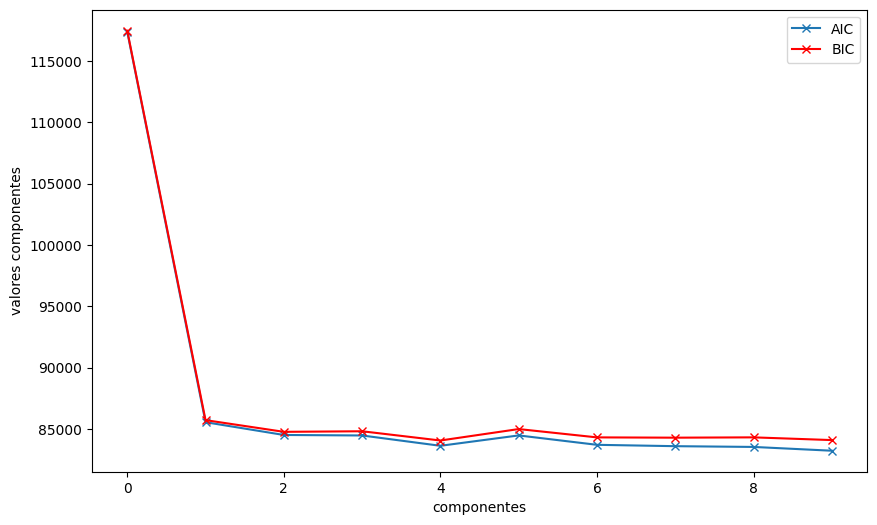

In [392]:
#antes de fitar o metodo gaussiano, vamos calcular e ver graficamente quantos componentes sao necessarios 
aic_ = []
bic_ = []
for gausian in range(1,11):
    gauss = GaussianMixture(n_components=gausian, random_state=42).fit(new_X)
    aic_.append(gauss.aic(new_X))
    bic_.append(gauss.bic(new_X))
plt.figure(figsize=(10,6))
plt.plot(aic_, label='AIC', marker='x')
plt.plot(bic_, label='BIC', marker='x', color='red')
plt.xlabel('componentes')
plt.ylabel('valores componentes')
plt.legend()
plt.show()

In [393]:
anomaly_models = {'gaussian_m': GaussianMixture(n_components=2, random_state=0),
                'iso_forest': IsolationForest(n_estimators=100, max_samples='auto',contamination=0.1, random_state=0),
                'bayes_gaussian':BayesianGaussianMixture(n_components=2, random_state=0),
                'one_class_svm':OneClassSVM()
}

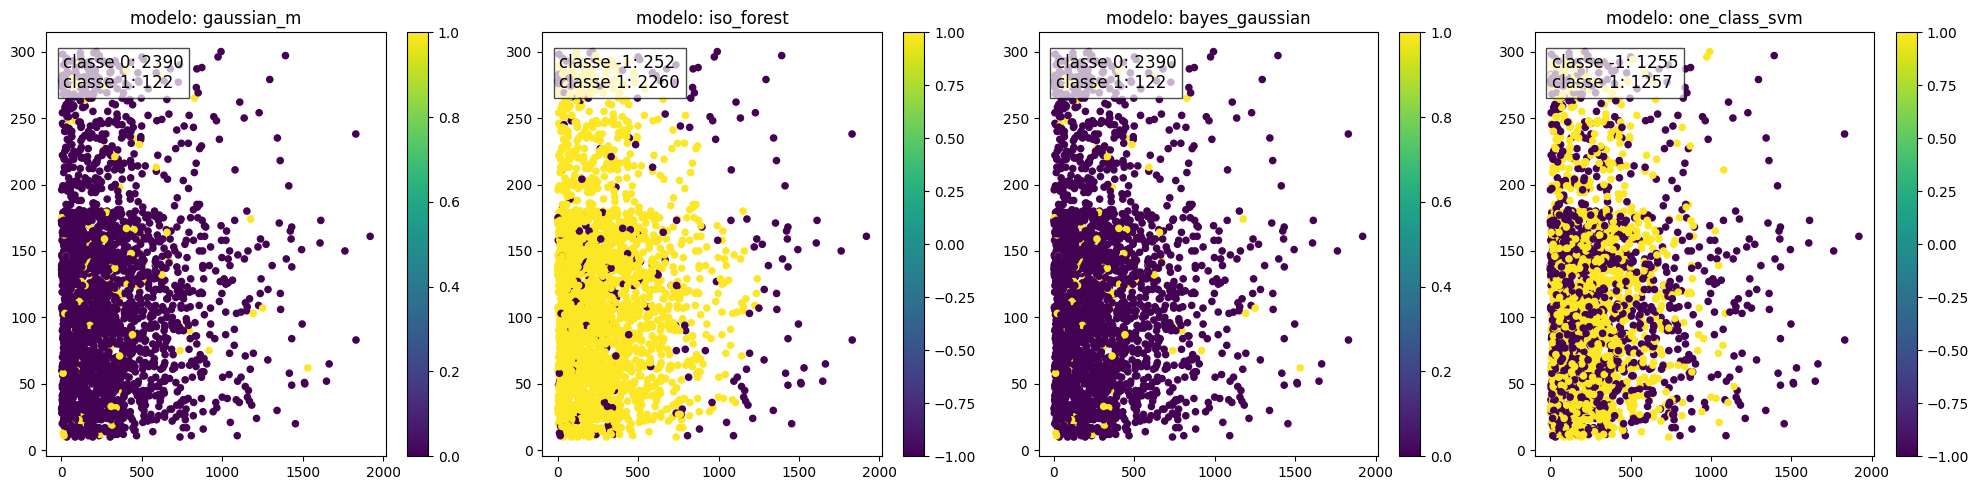

In [394]:
#fit e vizualizaçao do desempenho 
fig, axes = plt.subplots(1, len(anomaly_models), figsize=(5 * len(anomaly_models), 5))

for ax, (name, anomaly) in zip(axes, anomaly_models.items()):
    anomaly.fit(new_X)
    anomaly_pred = anomaly.predict(new_X)
        
    unique, counts = np.unique(anomaly_pred, return_counts=True)
    count_text = '\n'.join([f'classe {cls}: {cnt}' for cls, cnt in zip(unique, counts)])
    scatter = ax.scatter(new_X.iloc[:, 0], new_X.iloc[:, 1], c=anomaly_pred, cmap='viridis', s=20)
    ax.set_title(f'modelo: {name}')
    fig.colorbar(scatter, ax=ax)
    ax.text(0.05, 0.95, count_text, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
plt.tight_layout()
plt.show()

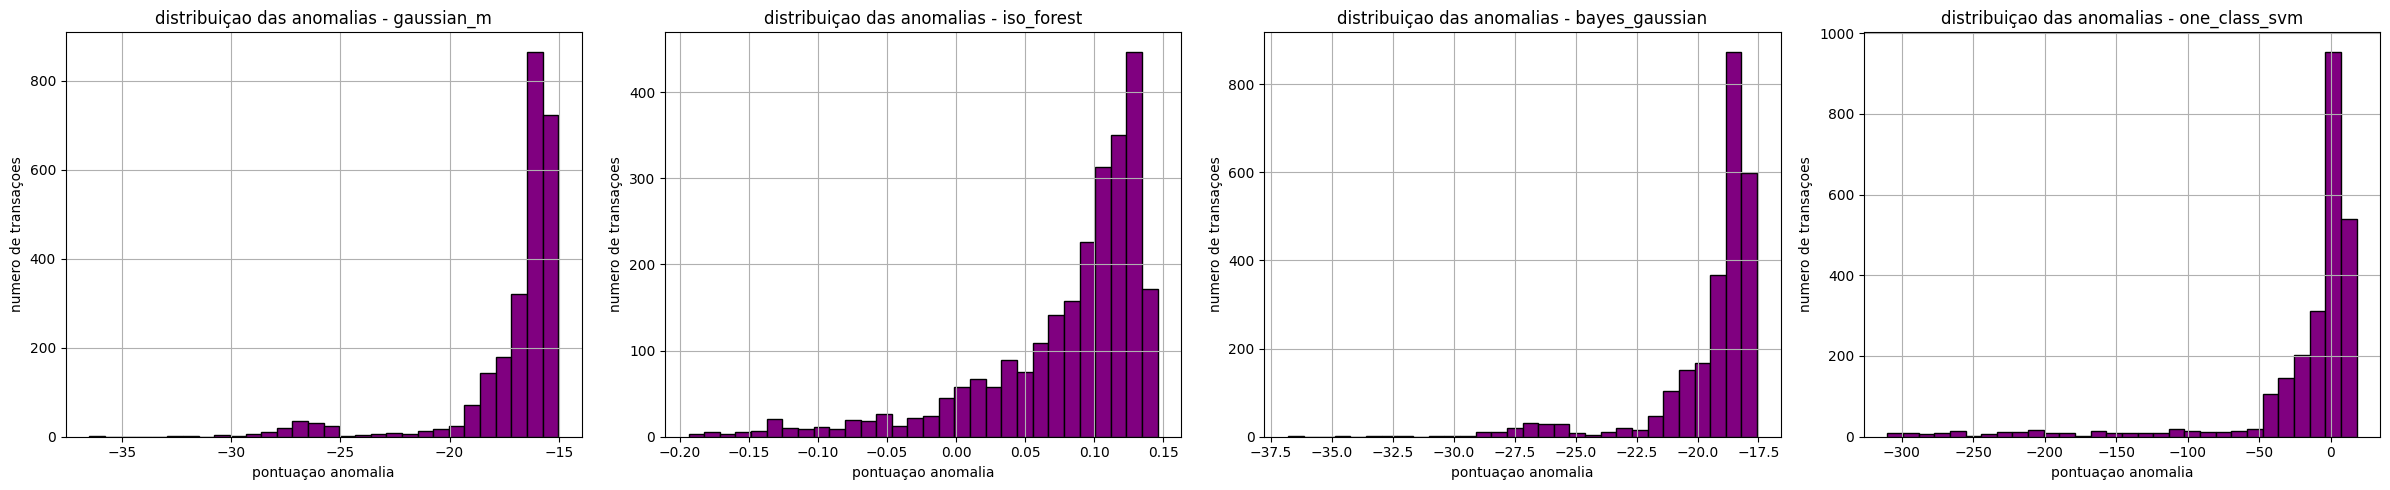

In [395]:
#vizualizando distribuiçao das pontuaçoes das anomalias
fig, axes = plt.subplots(1, len(anomaly_models), figsize=(6 * len(anomaly_models), 5))
if len(anomaly_models) == 1:
    axes = [axes]  
for ax, (name, model) in zip(axes, anomaly_models.items()):
    if hasattr(model, "decision_function"):
        anomaly_scores = model.decision_function(new_X)  
    elif hasattr(model, "score_samples"):
        anomaly_scores = model.score_samples(new_X)  
    else:
        continue  
    ax.hist(anomaly_scores, bins=30, color='purple', edgecolor='black')
    ax.set_title(f'distribuiçao das anomalias - {name}')
    ax.set_xlabel('pontuaçao anomalia')
    ax.set_ylabel('numero de transaçoes')
    ax.grid(True)
plt.tight_layout()  
plt.show()


os modelos que mais se aproximaram da detecçao do KMeans, foram: gaussian_m e bayes_gaussian
- podemos utilizar suas previsoes para criar nossa classe y

In [396]:
anomaly_g = GaussianMixture(n_components=2, random_state=0).fit(new_X)
anomaly_y = anomaly_g.predict(new_X)

In [397]:
df_1['FRAUD'] = anomaly_y
df_1['FRAUD'].value_counts()

FRAUD
0    2390
1     122
Name: count, dtype: int64

Modelagem 

In [398]:
df_1.head()


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,high_transaction,cluster,distance_centroid,FRAUD
TransactionDate,,,,,,,,,,,,,
2023-04-11 16:29:14,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,False,1,0.627683,0
2023-06-27 16:44:19,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,False,2,0.912412,0
2023-07-10 18:16:08,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,False,1,0.276223,0
2023-05-05 16:32:11,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,False,1,0.616155,0
2023-10-16 17:51:24,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,False,2,0.639987,0


In [399]:
df_1['FRAUD'].value_counts()

FRAUD
0    2390
1     122
Name: count, dtype: int64

In [400]:
#dropei as colunas cluster e distance_centroid pois ja foram uteis 
df_1 = df_1.drop('cluster', axis=1)
df_1 = df_1.drop('distance_centroid', axis=1)

In [401]:
x = df_1.drop('FRAUD', axis=1)
y = df_1['FRAUD']

In [402]:
#split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [403]:
x_train.shape, x_test.shape

((2009, 10), (503, 10))

In [404]:
y_train.shape, y_test.shape

((2009,), (503,))

In [405]:
#separaçao de atributos 
num_atribs = ['TransactionAmount', 
            'CustomerAge', 
            'TransactionDuration', 
            'LoginAttempts', 'AccountBalance',
            # 'cluster','distance_centroid', 
            #'FRAUD' 
            ]


cat_atribs = ['TransactionType', 
            'Location', 
            'Channel', 
            'CustomerOccupation',
            'high_transaction'
    
]

In [406]:
#pre processamento
column_transf = ColumnTransformer([
    ('scaler_pca', Pipeline(steps=[
        ('scaler',StandardScaler()),
        ('pca', IncrementalPCA(n_components=3, batch_size=500))
    ]), num_atribs),  
    ('one_hot', OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat_atribs)  
])

In [407]:
#pipe
pipe = Pipeline([
    ('transform', column_transf),
    ('model', GradientBoostingClassifier())  
])

In [ ]:
#modelos
models = {
    'D_tree': DecisionTreeClassifier(
        criterion='gini',
        max_depth=12,  
        min_samples_split=5,  
        min_samples_leaf=2,  
        max_features='sqrt',  
        class_weight='balanced'  
    ),
    'G_boost': GradientBoostingClassifier(
        learning_rate=0.03,  
        n_estimators=300,  
        max_depth=4,  
        subsample=0.85,  
        min_samples_split=5,  
        min_samples_leaf=2  
    ),
    'Random_f': RandomForestClassifier(
        n_estimators=300,  
        max_depth=12,  
        min_samples_split=4,  
        min_samples_leaf=2,  
        bootstrap=True,  
        class_weight='balanced'  
    ),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=200,  
        learning_rate=0.5  
    ),
    'Naive_b': BernoulliNB(
        alpha=0.3,  
        binarize=0.0  
    ),
    'Neural_net': MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),  
        activation='relu',  
        solver='adam',  
        alpha=0.0001,  
        learning_rate='adaptive',  
        batch_size=32,  
        max_iter=500  
    ),
    'SVC': SVC(
        kernel='rbf',  
        C=10,  
        probability=True,  
        class_weight='balanced'  
    ),
    'KNN': KNeighborsClassifier(
        n_neighbors=7,  
        weights='distance',  
        metric='minkowski',  
        p=2  
    )
}


In [429]:
#funçao metricas
def metrics(model_name, y_true, y_pred):
        acuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, y_pred)

        results = {'acuracia': acuracy,
        'f1': f1,
        'recall': recall,
        'precision': precision,
        'roc_auc':roc_auc
    }
    
        return results


In [430]:
#fit dos modelos e avaliaçao 
results_list = []
for i, (model_name, model) in enumerate(models.items()):
    pipe.set_params(model=model)  
    pipe.fit(x_train, y_train)  
    y_pred = pipe.predict(x_test)
    result = metrics(model_name=model, y_true=y_test, y_pred=y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results_list.append({
        'modelo': model_name,
        'acuracia': result['acuracia'],
        'f1': result['f1'],
        'recall': result['recall']
    })
    print(model_name)
    print(result)


D_tree
{'acuracia': 0.8369781312127237, 'f1': np.float64(0.32786885245901637), 'recall': np.float64(0.8333333333333334), 'precision': np.float64(0.20408163265306123), 'roc_auc': np.float64(0.8352470424495477)}
G_boost
{'acuracia': 0.9622266401590457, 'f1': np.float64(0.5581395348837209), 'recall': np.float64(0.5), 'precision': np.float64(0.631578947368421), 'roc_auc': np.float64(0.7426931106471816)}
Random_f
{'acuracia': 0.9264413518886679, 'f1': np.float64(0.463768115942029), 'recall': np.float64(0.6666666666666666), 'precision': np.float64(0.35555555555555557), 'roc_auc': np.float64(0.8030619345859429)}


C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
{'acuracia': 0.9622266401590457, 'f1': np.float64(0.5581395348837209), 'recall': np.float64(0.5), 'precision': np.float64(0.631578947368421), 'roc_auc': np.float64(0.7426931106471816)}
Naive_b
{'acuracia': 0.9502982107355865, 'f1': np.float64(0.0), 'recall': np.float64(0.0), 'precision': np.float64(0.0), 'roc_auc': np.float64(0.4989561586638831)}
Neural_net
{'acuracia': 0.952286282306163, 'f1': np.float64(0.45454545454545453), 'recall': np.float64(0.4166666666666667), 'precision': np.float64(0.5), 'roc_auc': np.float64(0.6978949199721642)}
SVC
{'acuracia': 0.9542743538767395, 'f1': np.float64(0.5490196078431373), 'recall': np.float64(0.5833333333333334), 'precision': np.float64(0.5185185185185185), 'roc_auc': np.float64(0.7780967292971469)}
KNN
{'acuracia': 0.9642147117296223, 'f1': np.float64(0.5), 'recall': np.float64(0.375), 'precision': np.float64(0.75), 'roc_auc': np.float64(0.6843684759916494)}


In [431]:
#tabela de metricas de previsoes
results_df = pd.DataFrame(results_list)
results_df

,modelo,acuracia,f1,recall
0,D_tree,0.836978,0.327869,0.833333
1,G_boost,0.962227,0.558140,0.500000
2,Random_f,0.926441,0.463768,0.666667
3,AdaBoost,0.962227,0.558140,0.500000
4,Naive_b,0.950298,0.000000,0.000000
5,Neural_net,0.952286,0.454545,0.416667
6,SVC,0.954274,0.549020,0.583333
7,KNN,0.964215,0.500000,0.375000


Over/Undersampling 

Undersampling

In [432]:
under = RandomUnderSampler(random_state=42, sampling_strategy='majority')

In [433]:
#balanceando 
x_train_under, y_train_under = under.fit_resample(x_train, y_train)

In [434]:
#fit com undersampling
results_list_under = []
for i, (model_name, model) in enumerate(models.items()):
    
    pipe.set_params(model=model)  
    pipe.fit(x_train_under, y_train_under)  
    y_pred = pipe.predict(x_test)
    result = metrics(model_name=model, y_true=y_test, y_pred=y_pred)
    


    results_list_under.append({
        'modelo': model_name,
        'acuracia': result['acuracia'],
        'f1': result['f1'],
        'recall': result['recall']
    })
    
    print(model_name)
    print(result)

D_tree
{'acuracia': 0.7415506958250497, 'f1': np.float64(0.14473684210526316), 'recall': np.float64(0.4583333333333333), 'precision': np.float64(0.0859375), 'roc_auc': np.float64(0.6070372303409881)}
G_boost
{'acuracia': 0.8131212723658051, 'f1': np.float64(0.2878787878787879), 'recall': np.float64(0.7916666666666666), 'precision': np.float64(0.17592592592592593), 'roc_auc': np.float64(0.8029314544189281)}
Random_f
{'acuracia': 0.8170974155069582, 'f1': np.float64(0.30303030303030304), 'recall': np.float64(0.8333333333333334), 'precision': np.float64(0.18518518518518517), 'roc_auc': np.float64(0.8248086290883786)}


C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
{'acuracia': 0.8111332007952287, 'f1': np.float64(0.2748091603053435), 'recall': np.float64(0.75), 'precision': np.float64(0.16822429906542055), 'roc_auc': np.float64(0.782098121085595)}
Naive_b
{'acuracia': 0.679920477137177, 'f1': np.float64(0.17435897435897435), 'recall': np.float64(0.7083333333333334), 'precision': np.float64(0.09941520467836257), 'roc_auc': np.float64(0.6934151009046625)}
Neural_net
{'acuracia': 0.8349900596421471, 'f1': np.float64(0.336), 'recall': np.float64(0.875), 'precision': np.float64(0.2079207920792079), 'roc_auc': np.float64(0.8539926931106472)}
SVC
{'acuracia': 0.8389662027833003, 'f1': np.float64(0.31932773109243695), 'recall': np.float64(0.7916666666666666), 'precision': np.float64(0.2), 'roc_auc': np.float64(0.816501391788448)}
KNN
{'acuracia': 0.8906560636182903, 'f1': np.float64(0.38202247191011235), 'recall': np.float64(0.7083333333333334), 'precision': np.float64(0.26153846153846155), 'roc_auc': np.float64(0.8040622825330551)}


In [435]:
results_under = pd.DataFrame(results_list_under)
results_under

,modelo,acuracia,f1,recall
0,D_tree,0.741551,0.144737,0.458333
1,G_boost,0.813121,0.287879,0.791667
2,Random_f,0.817097,0.303030,0.833333
3,AdaBoost,0.811133,0.274809,0.750000
4,Naive_b,0.679920,0.174359,0.708333
5,Neural_net,0.834990,0.336000,0.875000
6,SVC,0.838966,0.319328,0.791667
7,KNN,0.890656,0.382022,0.708333


Oversampling 



In [436]:
smote_nc = SMOTEN()
x_train_over, y_train_over = smote_nc.fit_resample(x_train, y_train)

In [437]:
pipe.set_params(model=GradientBoostingClassifier()).fit(x_train_over, y_train_over)
over_pred = pipe.predict(x_test)
metrics(GradientBoostingClassifier(),y_test,over_pred)

{'acuracia': 0.9582504970178927,
 'f1': np.float64(0.5333333333333333),
 'recall': np.float64(0.5),
 'precision': np.float64(0.5714285714285714),
 'roc_auc': np.float64(0.7406054279749478)}

In [438]:
y_train_over.value_counts()

FRAUD
0    1911
1    1911
Name: count, dtype: int64

In [439]:
#oversampling
results_list_over = []
for i, (model_name, model) in enumerate(models.items()):
    
    pipe.set_params(model=model)  
    pipe.fit(x_train_over, y_train_over)  
    y_pred = pipe.predict(x_test)
    result = metrics(model_name=model, y_true=y_test, y_pred=y_pred)
    
    results_list_over.append({
        'modelo': model_name,
        'acuracia': result['acuracia'],
        'f1': result['f1'],
        'recall': result['recall']
    })
    print(model_name)
    print(result)

D_tree
{'acuracia': 0.46520874751491054, 'f1': np.float64(0.10631229235880399), 'recall': np.float64(0.6666666666666666), 'precision': np.float64(0.05776173285198556), 'roc_auc': np.float64(0.5608907446068198)}
G_boost
{'acuracia': 0.9662027833001988, 'f1': np.float64(0.5853658536585366), 'recall': np.float64(0.5), 'precision': np.float64(0.7058823529411765), 'roc_auc': np.float64(0.7447807933194154)}
Random_f
{'acuracia': 0.9602385685884692, 'f1': np.float64(0.5), 'recall': np.float64(0.4166666666666667), 'precision': np.float64(0.625), 'roc_auc': np.float64(0.7020702853166318)}


C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
{'acuracia': 0.9502982107355865, 'f1': np.float64(0.4186046511627907), 'recall': np.float64(0.375), 'precision': np.float64(0.47368421052631576), 'roc_auc': np.float64(0.6770615866388309)}
Naive_b
{'acuracia': 0.8628230616302187, 'f1': np.float64(0.1038961038961039), 'recall': np.float64(0.16666666666666666), 'precision': np.float64(0.07547169811320754), 'roc_auc': np.float64(0.5321851078636048)}
Neural_net
{'acuracia': 0.9602385685884692, 'f1': np.float64(0.47368421052631576), 'recall': np.float64(0.375), 'precision': np.float64(0.6428571428571429), 'roc_auc': np.float64(0.6822807933194155)}
SVC
{'acuracia': 0.974155069582505, 'f1': np.float64(0.6285714285714286), 'recall': np.float64(0.4583333333333333), 'precision': np.float64(1.0), 'roc_auc': np.float64(0.7291666666666666)}
KNN
{'acuracia': 0.9582504970178927, 'f1': np.float64(0.4878048780487805), 'recall': np.float64(0.4166666666666667), 'precision': np.float64(0.5882352941176471), 'roc_auc': np.float64(0.7010264439805151

In [440]:
#resultado oversampling 
result_over = pd.DataFrame(results_list_over)
result_over

,modelo,acuracia,f1,recall
0,D_tree,0.465209,0.106312,0.666667
1,G_boost,0.966203,0.585366,0.500000
2,Random_f,0.960239,0.500000,0.416667
3,AdaBoost,0.950298,0.418605,0.375000
4,Naive_b,0.862823,0.103896,0.166667
5,Neural_net,0.960239,0.473684,0.375000
6,SVC,0.974155,0.628571,0.458333
7,KNN,0.958250,0.487805,0.416667


Curva AUC-ROC


C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


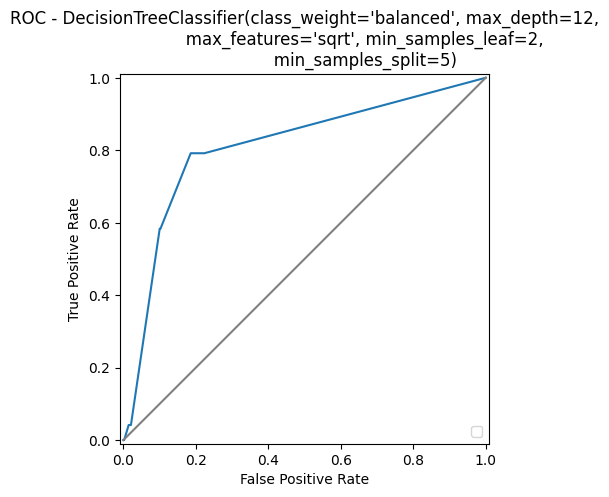

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


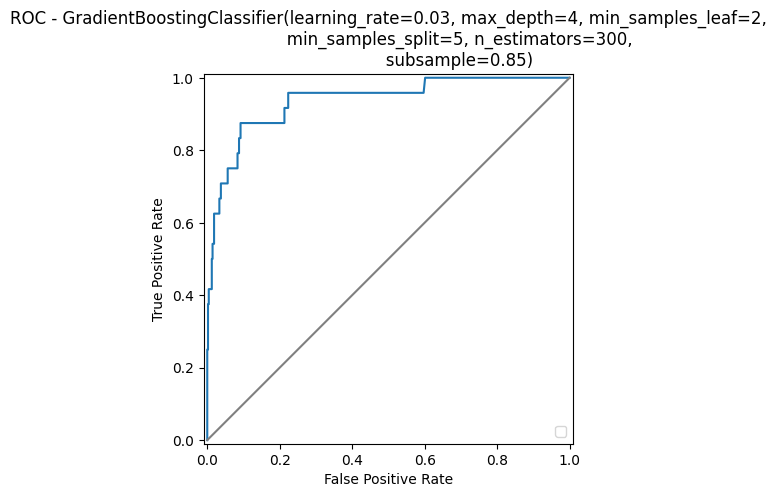

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


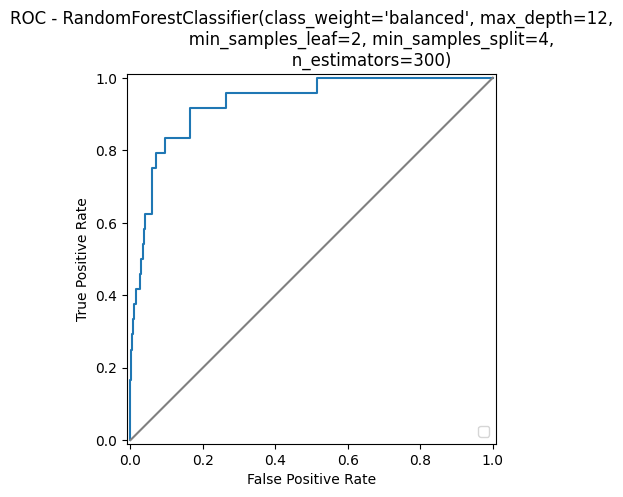

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


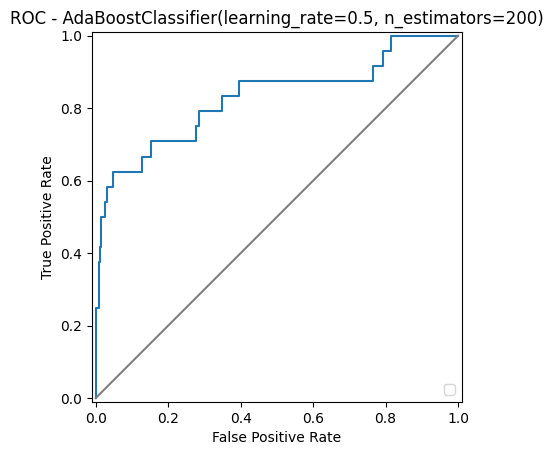

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


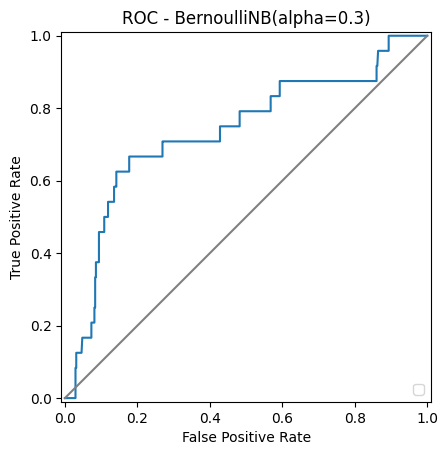

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


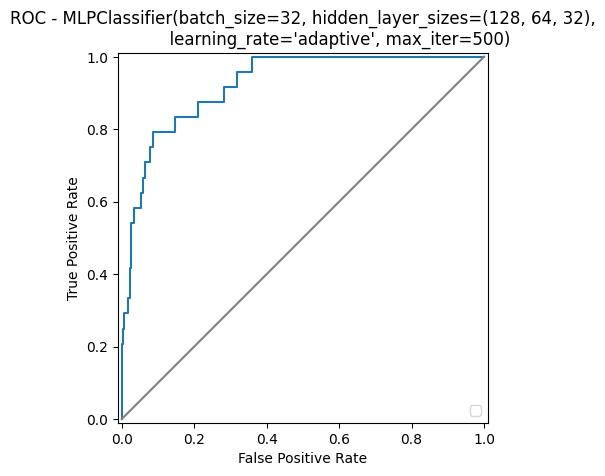

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


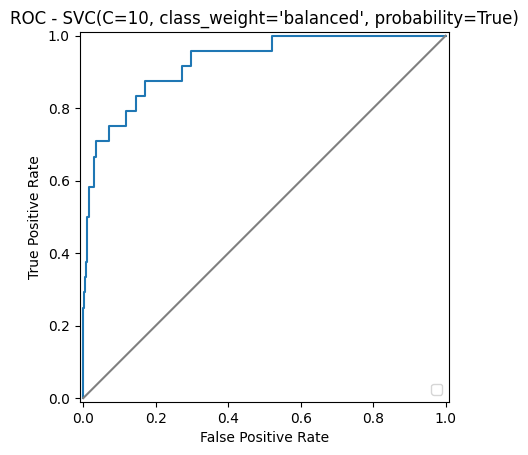

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


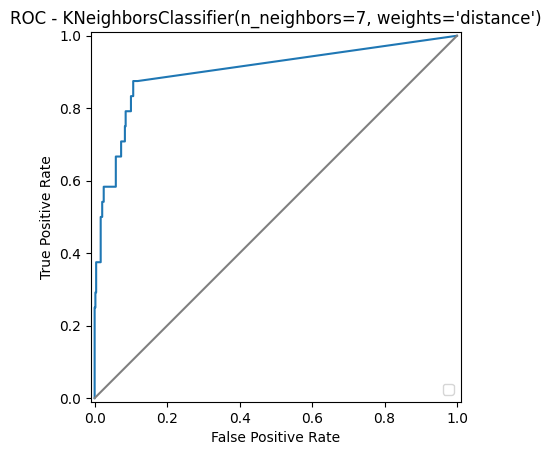

In [441]:
#dados normais
for i, roc_models in models.items():
    pipe.set_params(model=roc_models).fit(x_train, y_train)
    y_pred_prob = pipe.predict_proba(x_test)
    y_pred_prob = y_pred_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob)
    RocCurveDisplay(fpr=fpr, tpr=tpr, ).plot()
    plt.plot([0,1], [0,1], linestyle='-', color='gray')
    plt.title(f'ROC - {roc_models}')
    plt.show()

ROC undersampling

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


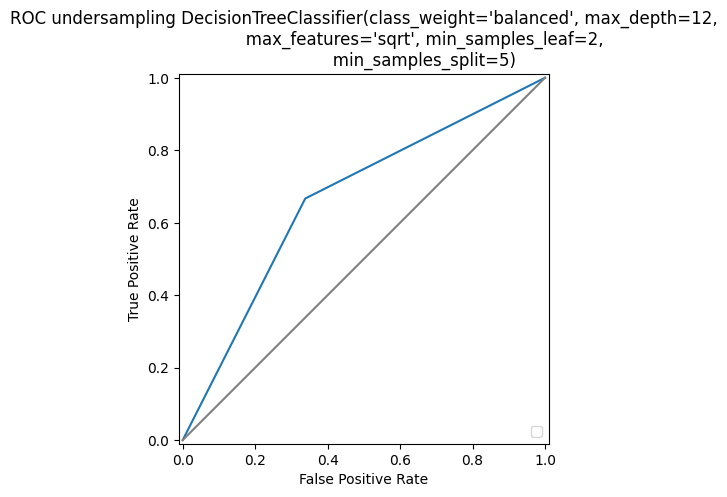

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


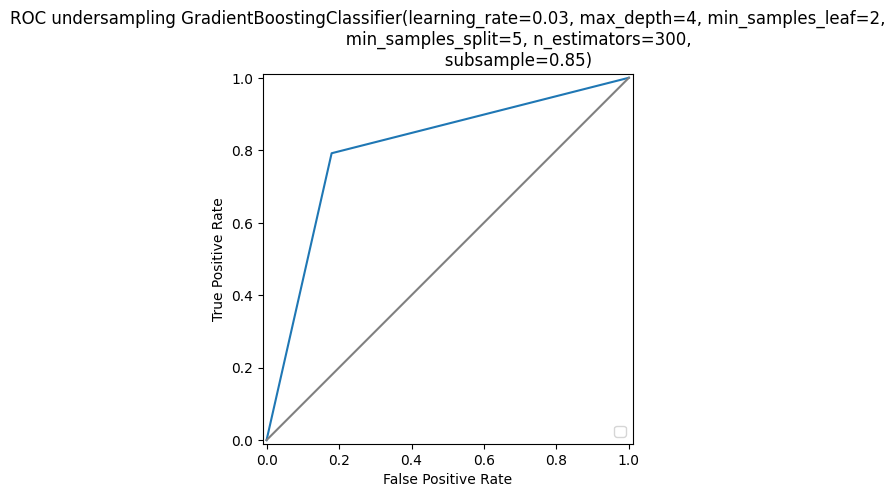

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


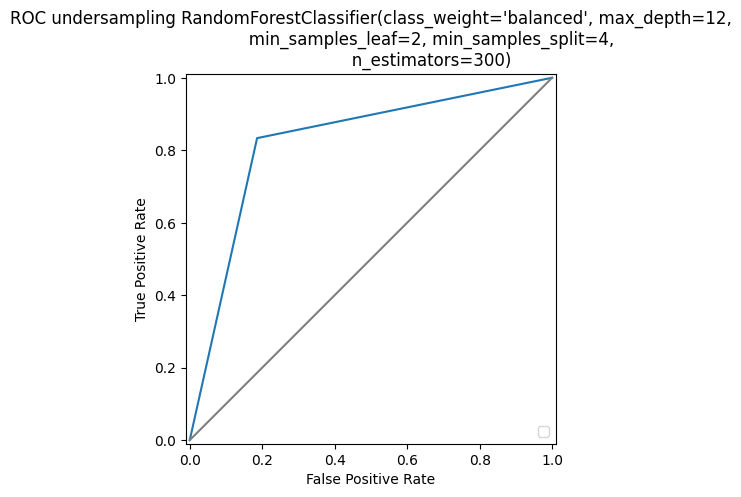

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


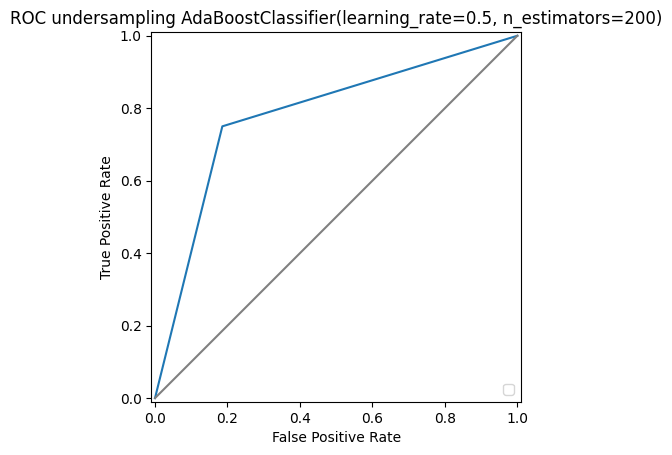

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


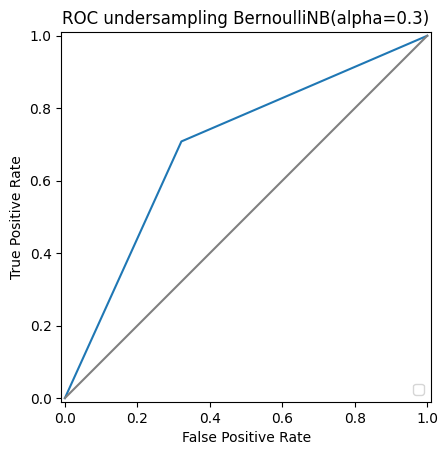

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


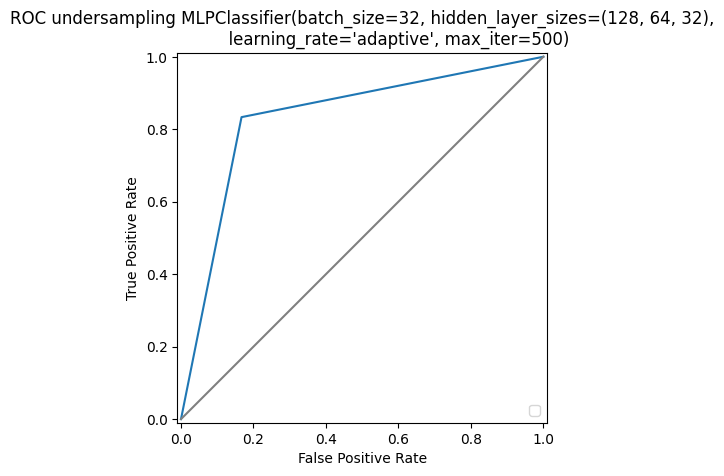

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


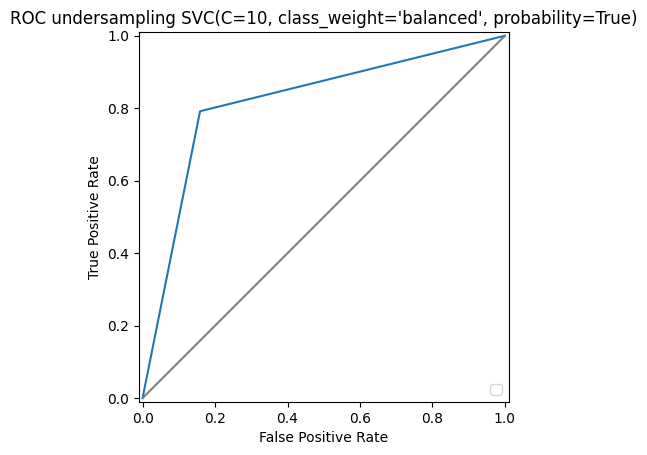

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


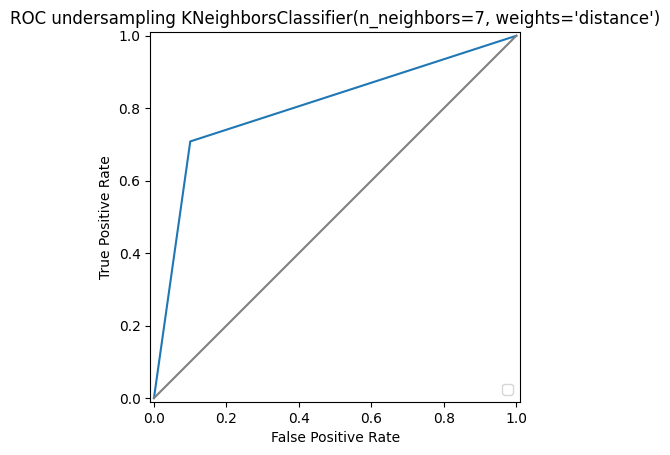

In [442]:
#roc undersampling
for i, roc_under in models.items():
    pipe.set_params(model=roc_under).fit(x_train_under, y_train_under)
    y_pred_prob_under = pipe.predict(x_test)
    fpr_under, tpr_under,threshold_under = roc_curve(y_test, y_pred_prob_under)
    RocCurveDisplay(fpr=fpr_under, tpr=tpr_under).plot()
    plt.plot([0,1], [0,1], linestyle='-', color='gray')
    plt.title(f'ROC undersampling {roc_under}')
    plt.show()

ROC oversampling

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


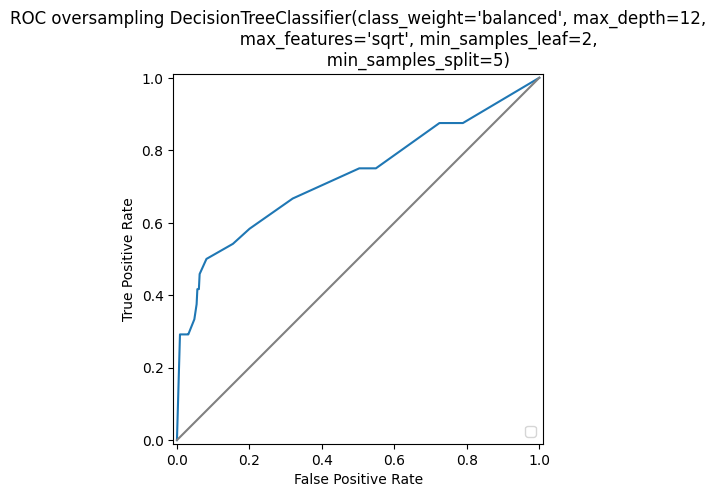

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


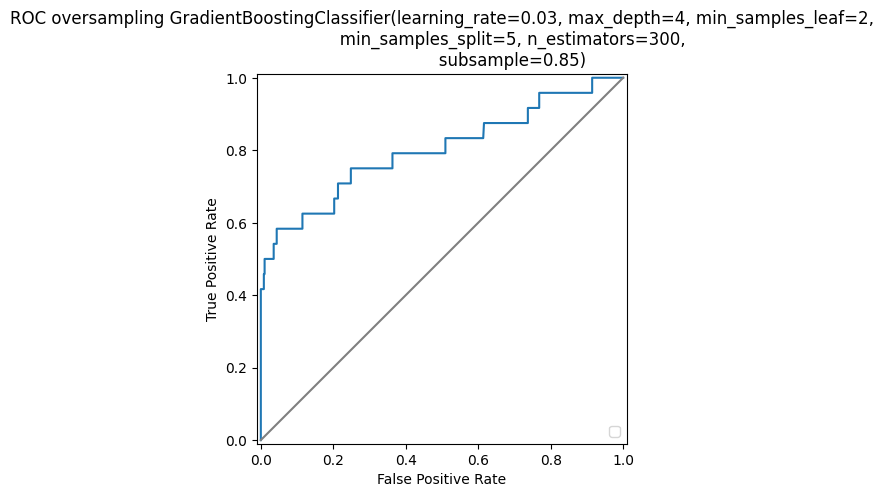

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


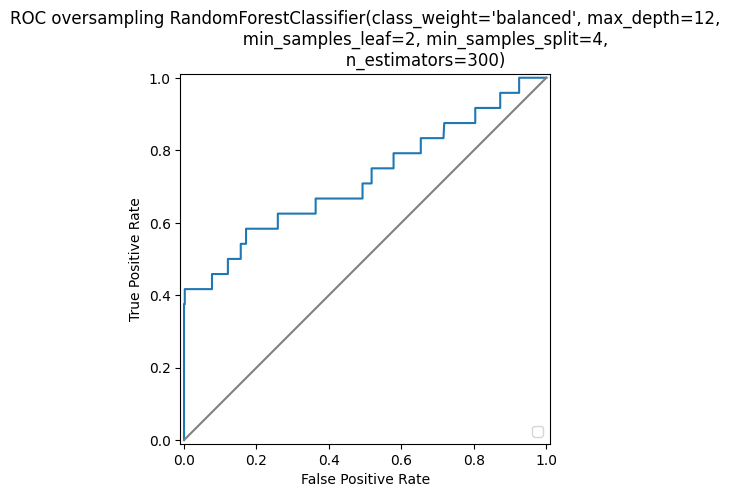

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


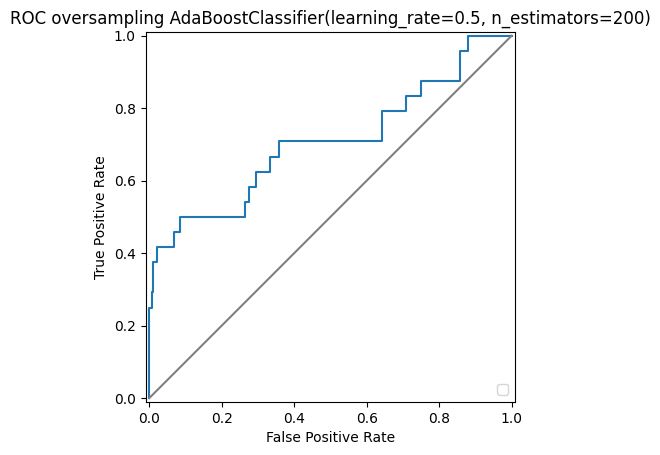

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


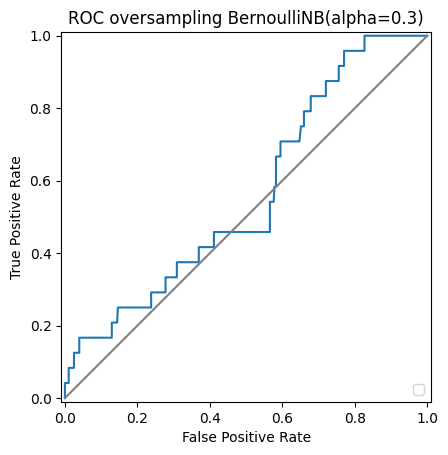

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


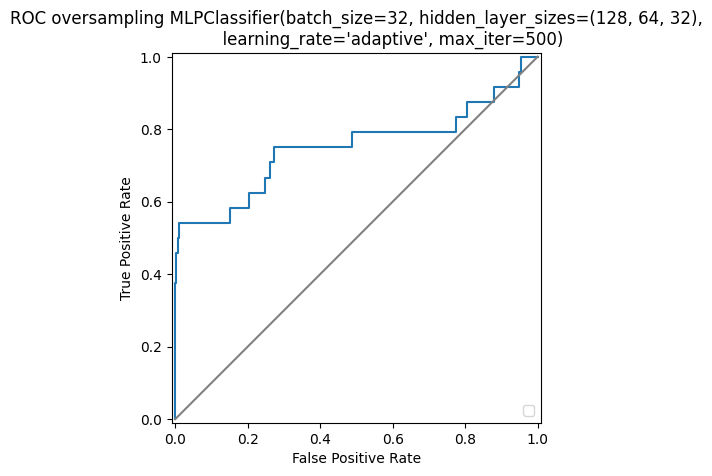

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


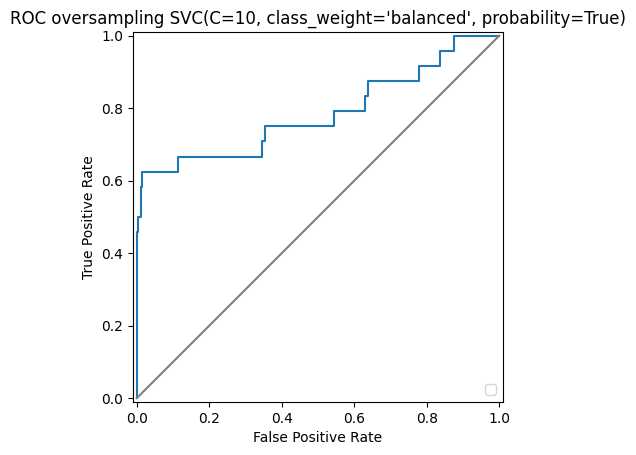

C:\Users\souza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


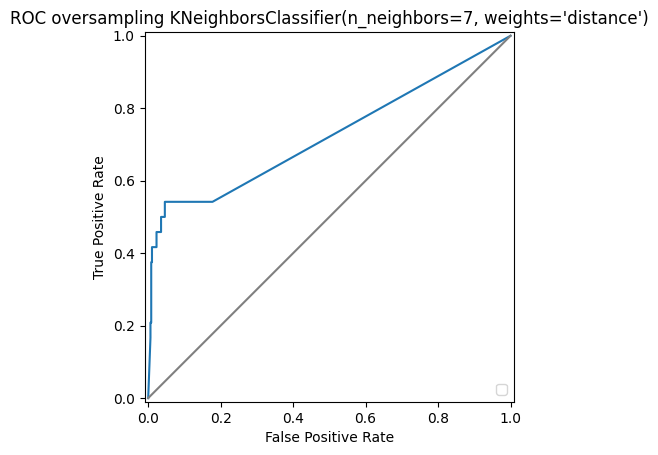

In [443]:
for i, roc_over in models.items():
    pipe.set_params(model=roc_over).fit(x_train_over, y_train_over)
    y_pred_prob_over = pipe.predict_proba(x_test)
    y_pred_prob_over = y_pred_prob_over[:,1]
    fpr_over, tpr_over, threshold_over = roc_curve(y_test, y_pred_prob_over)
    RocCurveDisplay(fpr=fpr_over, tpr=tpr_over).plot()
    plt.plot([0,1], [0,1], linestyle='-', color='gray')
    plt.title(f'ROC oversampling {roc_over}')
    plt.show()
